# Proyek Analisis Data: [Bike-Sharing-Dataset]
- **Nama:** Alexander Kent So
- **Email:** alexanderkentso96@gmail.com
- **ID Dicoding:** alexanderkentso

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh hari libur terhadap peminjaman sepeda?
- Pada jam berapa sepeda paling banyak dipinjam?
- Bagaimana pengaruh cuaca terhadap peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [4]:
day = pd.read_csv('data/day.csv')
# day.head()
hour = pd.read_csv('data/hour.csv')
# hour.head()

**Insight:**
- Membaca data .csv dalam bentuk data frame

### Assessing Data

In [5]:
def assess(df):
  print('Jumlah data:',df.shape[0])
  print('\nJumlah null:')
  print(df.isnull().sum())
  print('\nnilai ekstrim:')
  print(df.describe().loc[['min','max','mean','std']])
  print('\n\n')

print('DAY')
assess(day)

print('HOUR')
assess(hour)

DAY
Jumlah data: 731

Jumlah null:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

nilai ekstrim:
         instant    season        yr       mnth   holiday   weekday  \
min     1.000000  1.000000  0.000000   1.000000  0.000000  0.000000   
max   731.000000  4.000000  1.000000  12.000000  1.000000  6.000000   
mean  366.000000  2.496580  0.500684   6.519836  0.028728  2.997264   
std   211.165812  1.110807  0.500342   3.451913  0.167155  2.004787   

      workingday  weathersit      temp     atemp       hum  windspeed  \
min     0.000000    1.000000  0.059130  0.079070  0.000000   0.022392   
max     1.000000    3.000000  0.861667  0.840896  0.972500   0.507463   
mean    0.683995    1.395349  0.495385  0.474354  0.627894   0.190486   
std     0.465233    0.544894  0.

**Insight:**
- Data tidak menunjukan adanya null
- Data menunjukan kecil kemungkinan adanya invalid value

### Cleaning Data

In [6]:
day.drop('instant', axis=1, inplace=True)
day.drop('season', axis=1, inplace=True)
day.drop('atemp', axis=1, inplace=True)
day.drop('weekday', axis=1, inplace=True)
day.drop('holiday', axis=1, inplace=True)
day.drop('casual', axis=1, inplace=True)
day.drop('registered', axis=1, inplace=True)

hour.drop('instant', axis=1, inplace=True)
hour.drop('season', axis=1, inplace=True)
hour.drop('atemp', axis=1, inplace=True)
hour.drop('weekday', axis=1, inplace=True)
hour.drop('holiday', axis=1, inplace=True)
hour.drop('casual', axis=1, inplace=True)
hour.drop('registered', axis=1, inplace=True)

**Insight:**
- Beberapa kolom seperti instant, season, casual, registered, holiday, weekday, dan atemp kemungkinan redundant
- Kolom instant hanya merupakan index dari data sehingga bisa diabaikan
- Kolom season bisa diabaikan karena kita punya informasi yang lebih akurat dari kolom weathersit
- kolom casual dan registered bisa diabaikan dalam kasus ini karena kita lebih berfokus ke hasil keseluruhannya
- kolom holiday bisa diabaikan karena kita bisa mengetahui hari tersebut libur atau tidak dari kolom working day, kolom holiday juga tidak memberikan data yang cukup untuk analisis khusus karena hanya terjadi 1 atau 2 kali dalam sebulan
- Kolom weekday hanya menunjukan hari dari senin hingga minggu
- Kolom atemp hanya bentuk lain dari kolom temp
- Dengan mengurangi kolom, diharapkan bisa mengurangi beban komputasi

## Exploratory Data Analysis (EDA)

### Explore ...

In [7]:
# rata-rata peminjaman sepeda di hari libur dan hari kerja
# di sini menggunakan data dari day.csv karena saya ingin mengetahui 'cnt' dalam 1 hari kerja/libur
data_hari = day.groupby('workingday')['cnt'].mean()
print(data_hari,'\n')

# rata-rata peminjaman sepeda setiap jamnya
data_jam = hour.groupby('hr')['cnt'].mean()
print(data_jam,'\n')

# rata-rata peminjaman sepeda tergantung cuacanya
# di sini saya menggunakan data dari hour.csv karena weathersit berubah setiap jamnya
# dengan menggunakan data dari hour.csv hasil yang didapat menjadi lebih detail
data_cuaca = hour.groupby('weathersit')['cnt'].mean()
print(data_cuaca)

workingday
0    4330.168831
1    4584.820000
Name: cnt, dtype: float64 

hr
0      53.898072
1      33.375691
2      22.869930
3      11.727403
4       6.352941
5      19.889819
6      76.044138
7     212.064649
8     359.011004
9     219.309491
10    173.668501
11    208.143054
12    253.315934
13    253.661180
14    240.949246
15    251.233196
16    311.983562
17    461.452055
18    425.510989
19    311.523352
20    226.030220
21    172.314560
22    131.335165
23     87.831044
Name: cnt, dtype: float64 

weathersit
1    204.869272
2    175.165493
3    111.579281
4     74.333333
Name: cnt, dtype: float64


**Insight:**
- Pada bagian ini kita lakukan binning untuk menemukan rata-rata peminjaman sepeda dari tiap kriterianya
- Pada data pertama, bisa dilihat jika rata-rata jumlah peminjaman sepeda tidak jauh berbeda antaar hari kerja dan hari libur. Walau terjadi sedikit penurunan pada hari libur
- Pada data ke-2, bisa dilihat rata-rata peminjaman sepeda per jamnya
- Pada data ke-3, bisa dilihat penurunan jumlah peminjaman sepeda yang cukup signifikan seiring memburuknya keadaan cuaca

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh hari libur terhadap peminjaman sepeda?

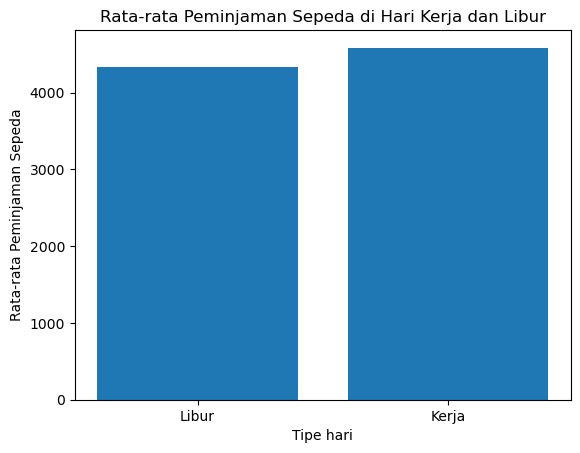

In [8]:
plt.bar(data_hari.index, data_hari.values)

plt.xlabel('Tipe hari')
plt.ylabel('Rata-rata Peminjaman Sepeda')
plt.title('Rata-rata Peminjaman Sepeda di Hari Kerja dan Libur')

plt.xticks(ticks=range(2), labels=['Libur', 'Kerja'])

plt.show()

### Pertanyaan 2: Pada jam berapa sepeda paling banyak dipinjam?

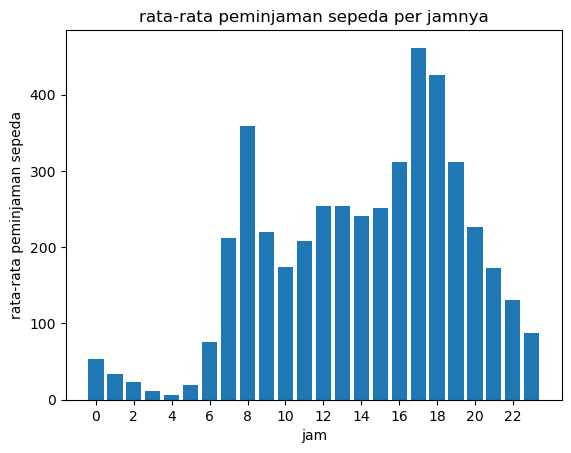

In [9]:
plt.bar(data_jam.index, data_jam.values)

plt.xlabel('jam')
plt.ylabel('rata-rata peminjaman sepeda')
plt.title('rata-rata peminjaman sepeda per jamnya')

plt.xticks(ticks=range(0,24,2))

plt.show()

### Pertanyaan 3: Bagaimana pengaruh cuaca terhadap peminjaman sepeda?


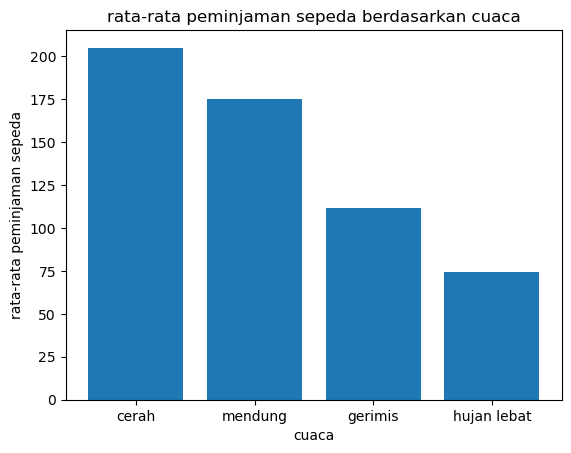

In [10]:
plt.bar(data_cuaca.index, data_cuaca.values)

plt.xlabel('cuaca')
plt.ylabel('rata-rata peminjaman sepeda')
plt.title('rata-rata peminjaman sepeda berdasarkan cuaca')

plt.xticks(ticks=range(1,5),labels=['cerah','mendung', 'gerimis', 'hujan lebat'])

plt.show()

**Insight:**
- Pada grafik 1, dapat dilihat jika rata-rata jumlah peminjaman sepeda antara hari libur dan hari kerja tidak memiliki perbedaan yang signifikan
- Pada grafik 2, kita dapat melihat rata-rata jumlah peminjaman sepeda untuk setiap jam nya
- Pada grafik 3, dapat dilihat seiring bertambah buruknya cuaca, semakin menurun juga jumlah rata-rata peminjaman sepeda

## Conclusion

- Hari libur tidak mempengaruhi jumlah peminjaman sepeda secara signifikan dan hanya menyebabkan sedikit penurunan jumlah peminjaman sepeda dibanding hari kerja
- Sepeda paling banyak dipinjam pada jam 5 sore. Jika dilihat dari grafiknya mungkin bisa diambil kesimpulan bahwa kebanyakan orang mulai beraktivitas dari jam 8 pagi dan pulang jam 5 sore
- Cuaca sangat berpengaruh dalam jumlah peminjaman sepeda. Semakin buruk cuacanya, semakin sedikit jumlah peminjaman sepeda